# EDSIGN ED-TECH INSIGHTS AND EFFICIENCY IMPROVEMENT

# Background

EdSigh Ed-Tech is a globally recognized online learning 
platform that provides a wide range of courses on a variety of topics. 
Since its inception in 2010, EdSigh Ed-Tech has grown to become one of 
the world's largest e-learning platforms, serving millions of students 
and teachers worldwide. EdSigh Ed-Tech's primary goal is to make education 
accessible and affordable to anyone with an internet connection. 
Teachers create and publish their courses on the platform, and 
students can enroll based on their interests and learning goals. 
EdSigh Ed-Tech offers certifications and training in courses, 
such as Business Finance, Graphics Design, Musical Instruments, and 
Web Development. EdSigh Ed-Tech 's extensive course catalog ranges 
from technology to business, art to personal growth.

# Objective

The Director of EdSigh Ed-Techcontacted you and your team of DataScientists because they are interested inleveraging the power of their data to gaininsights into the business and improve their efficiency.EdSigh Ed-Tech seeks to understand theperformance of each course and potential opportunities to increase business revenue.



# Methodology
The methodology used in this case study involves the following steps:

Data cleaning and preprocessing: The first step is to clean and preprocess the data, including handling missing values, removing outliers, and transforming variables as necessary.

Exploratory data analysis: Next, we will perform exploratory data analysis to gain insights into the data, such as identifying trends and patterns, and identifying correlations between variables.


In [1]:
# Import Libraries
import numpy as np
import pandas as pd   #used for Data preprocessing
import matplotlib.pyplot as plt   # used for Data Visualization
%matplotlib inline
import seaborn as sns   # used for Data Visualization
from collections import Counter # used for counting
import missingno as msno #used for Missing Data ; Data Visualisation
sns.set()
from subprocess import check_output #for viewing profile report
import warnings
warnings.filterwarnings("ignore")
import locale
import matplotlib.ticker as mticker
plt.style.use('ggplot')
from sklearn.metrics import classification_report, confusion_matrix
from pandas_profiling import ProfileReport

In [2]:
ed=pd.read_csv(r"C:\Users\opeye\Documents\Data Science\10Alytics\Internship\EdSigh\EdSigh Ed-Tech.csv")
ed.head(5)


Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   
2     133536            50855   
3     151668            29167   
4     648826            24481   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   
2               Stock Market Investing for Beginners      0        2698   
3                 Introduction to Financial Modeling      0        1463   
4         The Complete Financial Analyst Course 2017    195        2347   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   
2            15      All Levels    0.91               1.5   
3             8      All Levels    0.18               1.5   
4           174      All Levels    0.37              10.0   

    Published_Timestamp           Subject Date_Published Course_Type  
0  2013-04-20T02:25:22Z  Business Finance      4/20/2013        Free  
1  2013-04-07T21:39:25Z  Business Finance       4/7/2013        Free  
2  2013-12-25T19:53:34Z  Business Finance     12/25/2013        Free  
3  2014-05-27T16:22:16Z  Business Finance      5/27/2014        Free  
4  2016-01-21T01:38:48Z  Business Finance      1/21/2016        Paid

In [3]:
# To show columns and rows and general info of data
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3676 non-null   int64  
 1   Num_Subscribers      3676 non-null   int64  
 2   Course_Title         3676 non-null   object 
 3   Price                3676 non-null   int64  
 4   Num_Review           3676 non-null   int64  
 5   Num_Lectures         3676 non-null   int64  
 6   Level                3676 non-null   object 
 7   Rating               3676 non-null   float64
 8   Content_Duration     3676 non-null   float64
 9   Published_Timestamp  3676 non-null   object 
 10  Subject              3676 non-null   object 
 11  Date_Published       3676 non-null   object 
 12  Course_Type          3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


In [4]:
ed.shape

(3676, 13)

In [5]:
#To checkk description of numerical data
ed.describe()

Course_ID  Num_Subscribers        Price    Num_Review  Num_Lectures  \
count  3.676000e+03      3676.000000  3676.000000   3676.000000   3676.000000   
mean   6.757535e+05      3199.260881    66.115343    156.309848     40.129761   
std    3.431304e+05      9486.582966    61.056073    935.674518     50.398507   
min    8.324000e+03         0.000000     0.000000      0.000000      0.000000   
25%    4.074740e+05       112.000000    20.000000      4.000000     15.000000   
50%    6.876920e+05       912.500000    45.000000     18.000000     25.000000   
75%    9.608140e+05      2558.000000    95.000000     67.000000     46.000000   
max    1.282064e+06    268923.000000   200.000000  27445.000000    779.000000   

            Rating  Content_Duration  
count  3676.000000       3676.000000  
mean      0.610868          4.096137  
std       0.334287          6.054948  
min       0.000000          0.000000  
25%       0.280000          1.000000  
50%       0.760000          2.000000  
75%       0.930000          4.500000  
max       1.000000         78.500000

In [6]:
# To check description of categorical data
ed.describe(include=['object','bool'])

Course_Title       Level   Published_Timestamp  \
count                            3676        3676                  3676   
unique                           3663           4                  3672   
top     Acoustic Blues Guitar Lessons  All Levels  2017-02-07T17:20:39Z   
freq                                3        1925                     2   

                Subject Date_Published Course_Type  
count              3676           3676        3676  
unique                4           1210           2  
top     Web Development       5/1/2017        Paid  
freq               1203             21        3365

In [7]:
ed_profile = ProfileReport(ed, title='EdSign_Before_data_cleaning')
ed_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# To make a copy
ed1=ed.copy()
ed1.head(2)

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   

    Published_Timestamp           Subject Date_Published Course_Type  
0  2013-04-20T02:25:22Z  Business Finance      4/20/2013        Free  
1  2013-04-07T21:39:25Z  Business Finance       4/7/2013        Free

In [38]:

# Convert 'Date_Published' column to datetime
ed1['Date_Published'] = pd.to_datetime(ed1['Date_Published'])

# Extract day, month, and year into separate columns
ed1['Day'] = ed1['Date_Published'].dt.day
ed1['Month'] = ed1['Date_Published'].dt.month
ed1['Year'] = ed1['Date_Published'].dt.year

# Print the updated DataFrame
print(ed1)

      Course_ID  Num_Subscribers  \
0         49798            65576   
1         48841            56659   
2        133536            50855   
3        151668            29167   
4        648826            24481   
...         ...              ...   
3671    1227578               50   
3672    1277924               44   
3673    1248172               34   
3674    1250934               25   
3675    1270222               19   

                                           Course_Title  Price  Num_Review  \
0     Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1       Accounting in 60 Minutes - A Brief Introduction      0        4397   
2                  Stock Market Investing for Beginners      0        2698   
3                    Introduction to Financial Modeling      0        1463   
4            The Complete Financial Analyst Course 2017    195        2347   
...                                                 ...    ...         ...   
3671           Learni

In [39]:
ed1.head(5)

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   
2     133536            50855   
3     151668            29167   
4     648826            24481   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   
2               Stock Market Investing for Beginners      0        2698   
3                 Introduction to Financial Modeling      0        1463   
4         The Complete Financial Analyst Course 2017    195        2347   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   
2            15      All Levels    0.91               1.5   
3             8      All Levels    0.18               1.5   
4           174      All Levels    0.37              10.0   

    Published_Timestamp           Subject Date_Published Course_Type  Day  \
0  2013-04-20T02:25:22Z  Business Finance     2013-04-20        Free   20   
1  2013-04-07T21:39:25Z  Business Finance     2013-04-07        Free    7   
2  2013-12-25T19:53:34Z  Business Finance     2013-12-25        Free   25   
3  2014-05-27T16:22:16Z  Business Finance     2014-05-27        Free   27   
4  2016-01-21T01:38:48Z  Business Finance     2016-01-21        Paid   21   

   Month  Year  
0      4  2013  
1      4  2013  
2     12  2013  
3      5  2014  
4      1  2016

In [40]:
#to check unique value in each column

for i in ed1.columns.tolist():
    print(i, '\n\n', ed1[i].unique())
    print('\n ------------------------------------------------------------------------------------------------------')

Course_ID 

 [  49798   48841  133536 ... 1248172 1250934 1270222]

 ------------------------------------------------------------------------------------------------------
Num_Subscribers 

 [65576 56659 50855 ...   203   109   102]

 ------------------------------------------------------------------------------------------------------
Course_Title 

 ['Bitcoin or How I Learned to Stop Worrying and Love Crypto'
 'Accounting in 60 Minutes - A Brief Introduction'
 'Stock Market Investing for Beginners' ...
 'Essentials of Spring 5.0 for Developers'
 'Display and analyze GIS data on the web with Leaflet.js'
 'Learning Path: Web Applications with Spring and Angular']

 ------------------------------------------------------------------------------------------------------
Price 

 [  0 195 200  60  95  20 100  30  75 180 150 155  45 105 185  50 115 125
  25 160 120  90 175  40  35 145 170 190  80  65 140  70  55 130  85 165
 135 110]

 --------------------------------------------------------

In [10]:
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

# Univariate Analysis

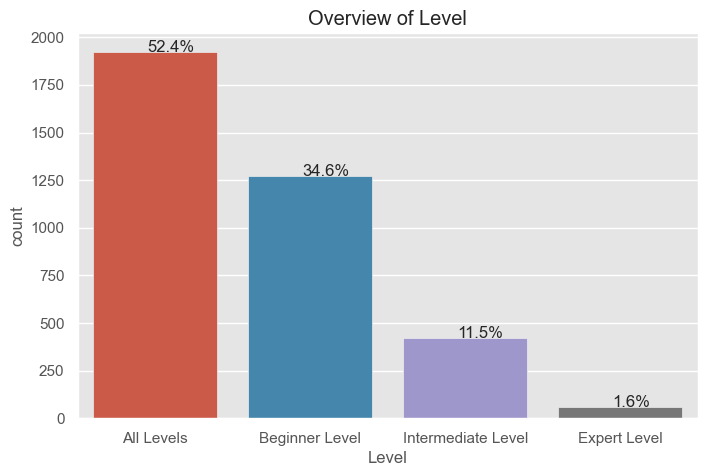

In [23]:
# Overview of level (the difficulty or proficiency level of a course)
plt.figure(figsize=(8,5))
ax = sns.countplot(x=ed1['Level'], order= ed1['Level'].value_counts(ascending=False).index)
values = ed1['Level'].value_counts(ascending=False).values
plt.title('Overview of Level')
perc_plot(ax,ed1.Level)

Obsevation:
Most of the students request for courses at the Beginner level agt 34.6% with the least being Expert Level at 1.6%. EdSign Ed-Tech should reveiw Expert level courses and make sure they are updated and at the appropriate profficiency level. The data by the school also needs to be reviewed as we do not have a clear information of what 'All Levels' entails and this accounts for 52.4% of the data.

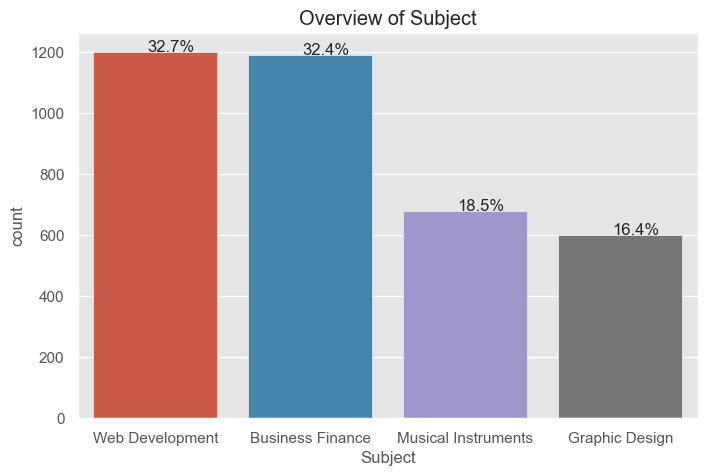

In [24]:
# Overview of Subject (specific field or discipline to which a course belongs.)
plt.figure(figsize=(8,5))
ax = sns.countplot(x=ed1['Subject'], order= ed1['Subject'].value_counts(ascending=False).index)
values = ed1['Subject'].value_counts(ascending=False).values
plt.title('Overview of Subject')
perc_plot(ax,ed1.Subject)

Observation:
Most of the students are studying Web Development or Business Finance; this accounts for 65.1% of the total data. While the other 2 subjects, Musical Instruments and Graphic Design are only studied by 34.9% of the students. EdSign Ed-Tech should therefore review marketing strategies as well as corriculums for the subjects that are lagging behind. Also should be subject(categories) be broader to have a better overview of student/subject preference.
    

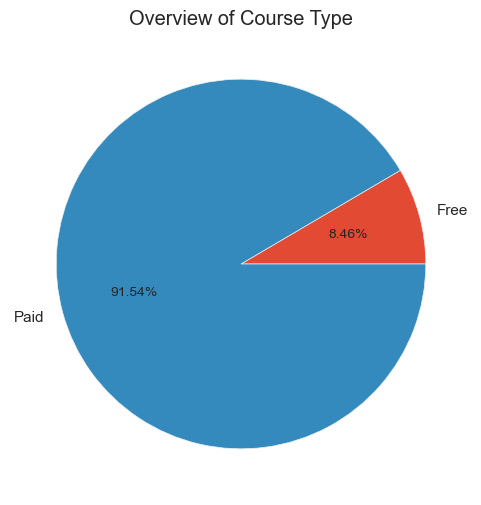

In [30]:
#Total count by Course Type (In percentage)
fig,ax = plt.subplots(figsize=(6,6))
count = Counter(ed1['Course_Type'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Overview of Course Type')
plt.show();

Observation:
Only 8.46% of the courses EdSign Ed-Tech offers is free. 

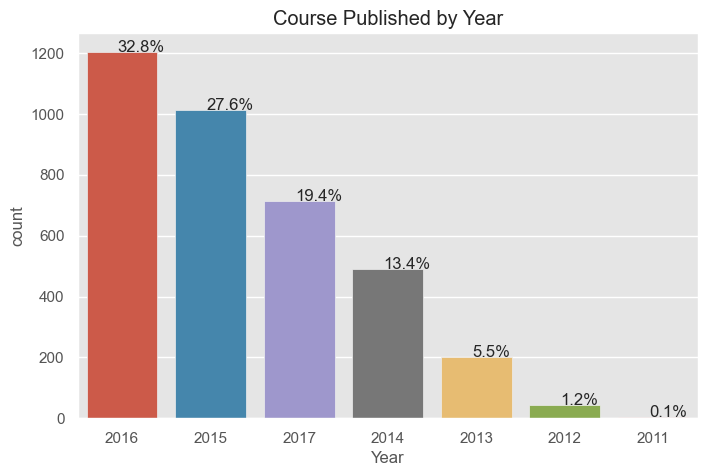

In [49]:
# Overview of year when a course was published or made available to learners

plt.figure(figsize=(8,5))
ax = sns.countplot(x=ed1['Year'], order= ed1['Year'].value_counts(ascending=False).index)
values = ed1['Year'].value_counts(ascending=False).values
plt.title('Course Published by Year')
perc_plot(ax,ed1.Year)

Observation:
There has been a steady annual increase in the courses published from 2011 to 2016. However, there is a drop in the year 2017. The organization should ensure the a continuous growth and add more courses preferablee in the subjects lagging behind into the corriculum.  
    

<AxesSubplot:xlabel='Price', ylabel='Count'>

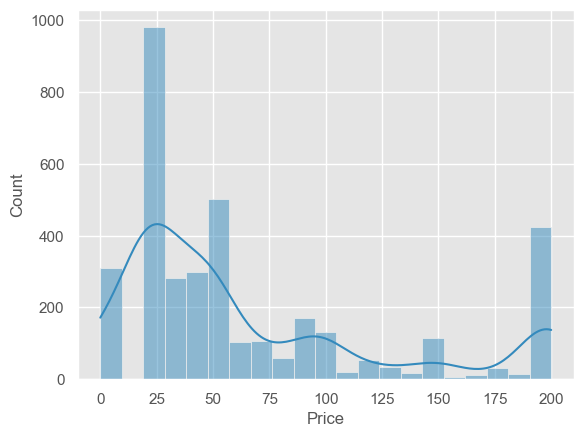

In [36]:
# Check Price distribution

sns.histplot(ed1['Price'],kde=True)

#### Observation:
Most of the students subscribed to courses with price ranging from $50 and below (Highest within the $25 range). Also there is a substantial subscrption for the courses within the $200 price range. 

Bivariate Analysis

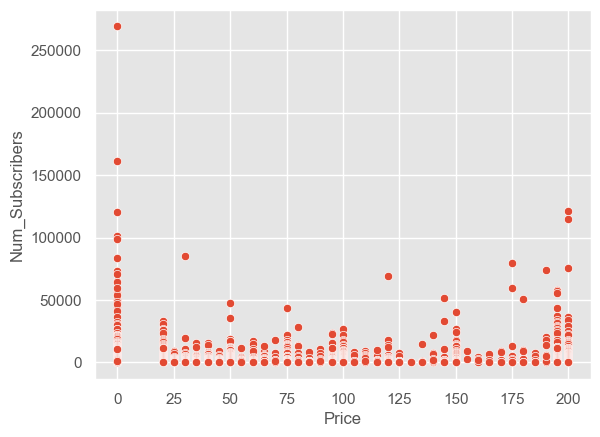

In [32]:
# Check for relationship between Number of Subscribers and Price

sns.scatterplot(x='Price',y='Num_Subscribers', data=ed1)
plt.ticklabel_format(style='plain')

Observation:
There is a higher subscription for the free courses ($0) compared to the other courses. There also seems to be a spike in subscribes in courses within price ranging from $175 to $200. However, there does not seem to be a direct correlation between Number of subscribers and the Price.

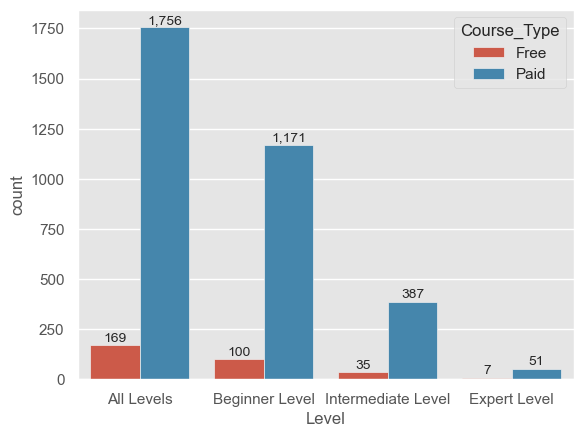

In [47]:
# To compare the course type against the number of students at each level

# Set the locale for formatting
locale.setlocale(locale.LC_ALL, '')

# Count the occurrences of each combination of 'Level' and 'Course_Type'
counts = ed1.groupby(['Level', 'Course_Type']).size().reset_index(name='Count')

# Plot the countplot
ax = sns.countplot(x='Level', hue='Course_Type', data=ed1)

# Add count labels on top of each bar with commas
for p in ax.patches:
    ax.annotate(locale.format_string("%d", p.get_height(), grouping=True), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

Observation: 
The percentage of free courses to paid courses falls within the rate of 9% to 13% across the levels. As stated earlier, most students are registering for courses at the Beginner level even though the company has been operating for 7 years. The company should reveiw its corriculum and implement strategies to drive other levels.


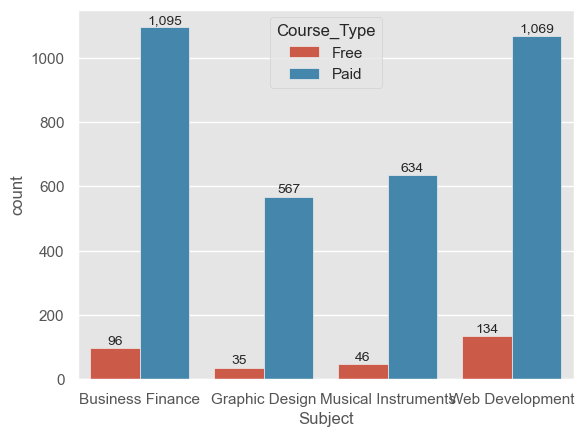

In [48]:
# To compare the course type against the number of students for each subject

# Set the locale for formatting
locale.setlocale(locale.LC_ALL, '')

# Count the occurrences of each combination of 'Level' and 'Course_Type'
counts = ed1.groupby(['Subject', 'Course_Type']).size().reset_index(name='Count')

# Plot the countplot
ax = sns.countplot(x='Subject', hue='Course_Type', data=ed1)

# Add count labels on top of each bar with commas
for p in ax.patches:
    ax.annotate(locale.format_string("%d", p.get_height(), grouping=True), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

Observation:.
Web development offers the highet number of free courses while Graphic design has the least. The ratio of course type to subject falls within the range of 6% to 12%. As stated earlier, EdSign Ed-Tech, should carry out marketing strategies to drive the Graphic Design and Musical Instruments courses.

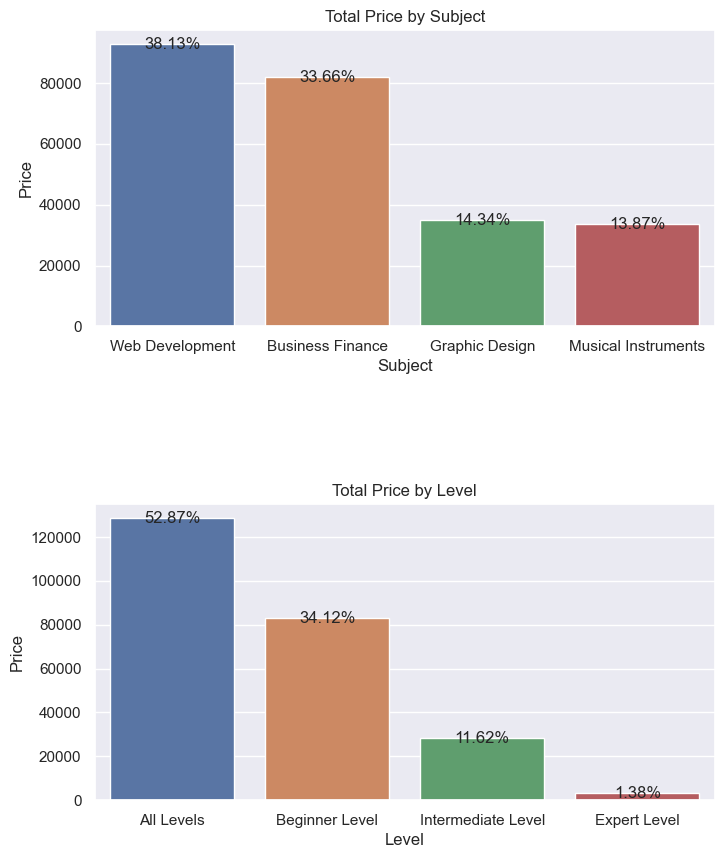

In [66]:
#To evaluate cost against subject and level
fig, axs = plt.subplots(nrows=2, figsize=(8,10))

sub_rev = ed1.groupby('Subject')['Price'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Subject', data=sub_rev, y='Price', ax=axs[0])
axs[0].set_title('Total Price by Subject')

total_rev = sub_rev['Price'].sum()
for p in axs[0].patches:
    percentage = 100 * p.get_height() / total_rev
    axs[0].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

sub_lect = ed1.groupby('Level')['Price'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Level', data=sub_lect, y='Price', ax=axs[1])
axs[1].set_title('Total Price by Level')

total_lect = sub_lect['Price'].sum()
for p in axs[1].patches:
    percentage = 100 * p.get_height() / total_lect
    axs[1].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
    
# Add space between the subplots
plt.subplots_adjust(hspace=0.6)

plt.show()


Observation:
The most expensive subject is Web Development at 38.13% with the least being Musical Instrucments at 13.87%. While the beginner level courses are the most expensive with at 34.12% with the Expert Level being the least at 1.38%. This may be a factor of the number of courses available in these categories. To drive business revenue, new and relevant courses should be added to the other categories. There should also be aggressive marketing and awarness to ensure increased registration in these new fileds. 

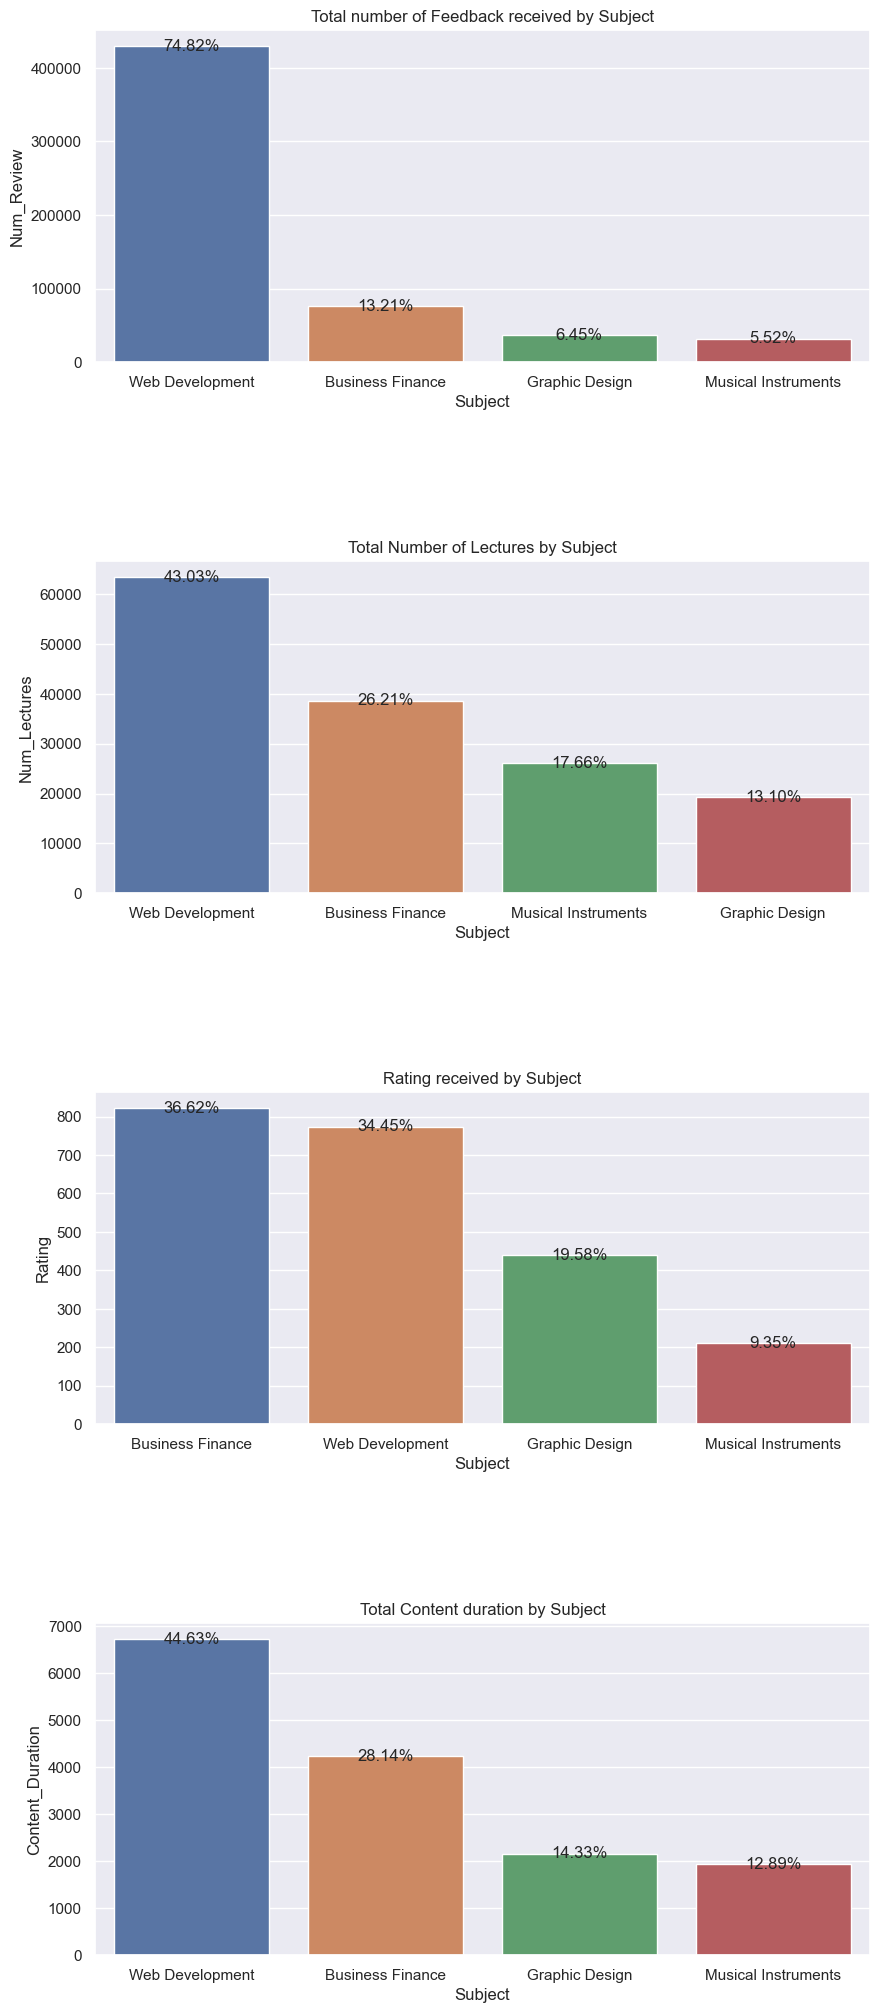

In [60]:
#An overview on the Subjects being offered

fig, axs = plt.subplots(nrows=4, figsize=(10, 25))

sub_rev = ed1.groupby('Subject')['Num_Review'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Subject', data=sub_rev, y='Num_Review', ax=axs[0])
axs[0].set_title('Total number of Feedback received by Subject')

total_rev = sub_rev['Num_Review'].sum()
for p in axs[0].patches:
    percentage = 100 * p.get_height() / total_rev
    axs[0].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

sub_lect = ed1.groupby('Subject')['Num_Lectures'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Subject', data=sub_lect, y='Num_Lectures', ax=axs[1])
axs[1].set_title('Total Number of Lectures by Subject')

total_lect = sub_lect['Num_Lectures'].sum()
for p in axs[1].patches:
    percentage = 100 * p.get_height() / total_lect
    axs[1].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

sub_rat = ed1.groupby('Subject')['Rating'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Subject', data=sub_rat, y='Rating', ax=axs[2])
axs[2].set_title('Rating received by Subject')

total_rating = sub_rat['Rating'].sum()
for p in axs[2].patches:
    percentage = 100 * p.get_height() / total_rating
    axs[2].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

sub_dur = ed1.groupby('Subject')['Content_Duration'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Subject', data=sub_dur, y='Content_Duration', ax=axs[3])
axs[3].set_title('Total Content duration by Subject')

total_duration = sub_dur['Content_Duration'].sum()
for p in axs[3].patches:
    percentage = 100 * p.get_height() / total_duration
    axs[3].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Add space between the subplots
plt.subplots_adjust(hspace=0.6)

plt.show()

Observation:
Feedback and Reviews by Subject: The Highest feed back received is Web Development at 74.8%. With the lowest being musical instruments at 5.5%. Although Webdevelopement has the highest number of student subscription/Registration at 32.7%, there may be a problem why students are not providing feedback on the other subjects.Business Finance has a 32.4% subscription but a 13.2% review and feedback. Is the organization offering proper channels for feedback on these other subjects? Are the students aware of these channels? Thorough investigation should be carried out to ensure adequate feedback is received as this will encourgage positive development and growth in the organization.

Total number of Lectures by Subject: Web Development offers this highest number of courses at 43.03% with the least being Graphic design at 13.1%. There is an obvious lapse in the curriculum. The organization needs to update the lessons on the other subjects to ensure drive subscriptions that will lead to increased revenue. 

Ratings Received by Subject: Business Finance has the highest rating received at 36.62% with Musical Instruments being the least at 9.35%. The courses and lectures offered in the Musical Instrument and Graphic Design subjects needs to be updated and up to par with organization in the similar field. 

Content Duration by Subject: Web Development has the highest at 44.63% with the least being Musical Instruments at 12.89%. As stated earlier the clear gap in the various subjects needs to be reduced. New courses need to be added to other subject as this will improve revenue and efficieny.

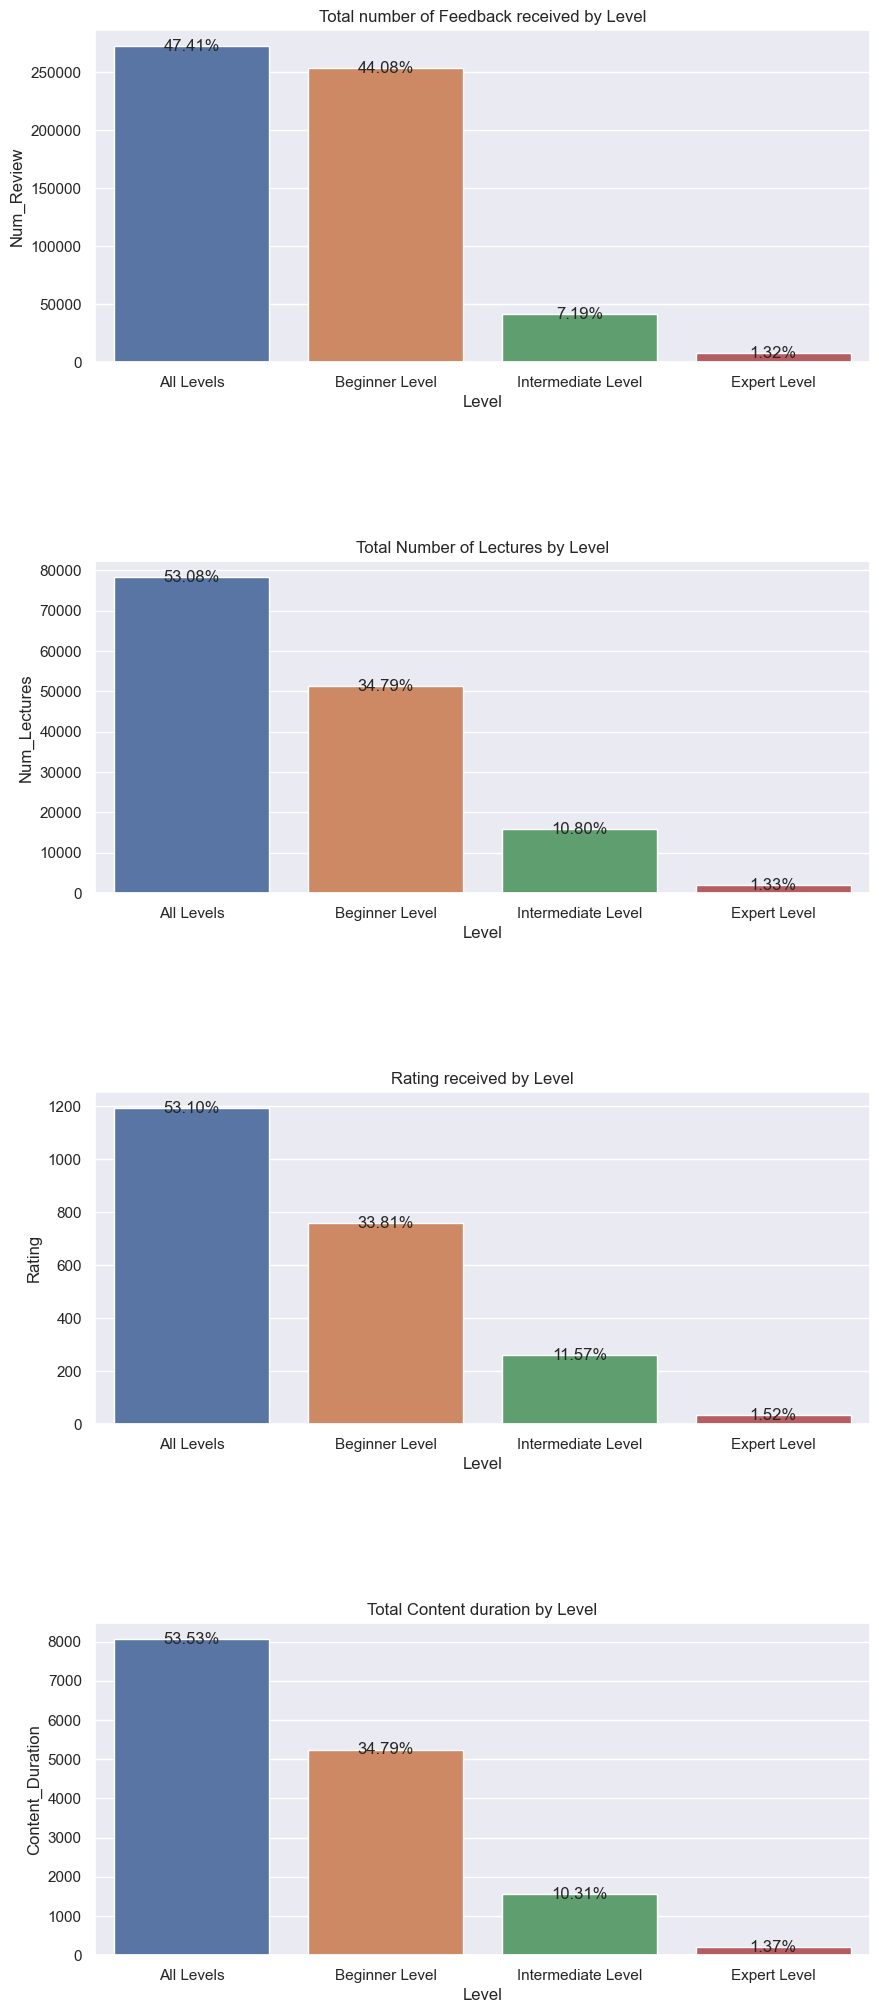

In [70]:
# An overview of the levels available

fig, axs = plt.subplots(nrows=4, figsize=(10, 25))

lev_rev = ed1.groupby('Level')['Num_Review'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Level', data=lev_rev, y='Num_Review', ax=axs[0])
axs[0].set_title('Total number of Feedback received by Level')

total_rev = lev_rev['Num_Review'].sum()
for p in axs[0].patches:
    percentage = 100 * p.get_height() / total_rev
    axs[0].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

lev_lect = ed1.groupby('Level')['Num_Lectures'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Level', data=lev_lect, y='Num_Lectures', ax=axs[1])
axs[1].set_title('Total Number of Lectures by Level')

total_lect = lev_lect['Num_Lectures'].sum()
for p in axs[1].patches:
    percentage = 100 * p.get_height() / total_lect
    axs[1].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

lev_rat = ed1.groupby('Level')['Rating'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Level', data=lev_rat, y='Rating', ax=axs[2])
axs[2].set_title('Rating received by Level')

total_rating = lev_rat['Rating'].sum()
for p in axs[2].patches:
    percentage = 100 * p.get_height() / total_rating
    axs[2].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

lev_dur = ed1.groupby('Level')['Content_Duration'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Level', data=lev_dur, y='Content_Duration', ax=axs[3])
axs[3].set_title('Total Content duration by Level')

total_duration = lev_dur['Content_Duration'].sum()
for p in axs[3].patches:
    percentage = 100 * p.get_height() / total_duration
    axs[3].annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Add space between the subplots
plt.subplots_adjust(hspace=0.6)

plt.show()

Observation: 
The Beginner Level has the highest in terms of Number of Lectures, Reveiws, Content and Rating. This is why the same category has the highest number of subscription. To improve the other levels, EdSign Ed-Tech needs to improve its curriculum on the other levels as this will drive subscription as well as revenue.

In [41]:
ed1.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type',
       'Day', 'Month', 'Year'],
      dtype='object')

Multivariate Analysis


Multivariate Analysis

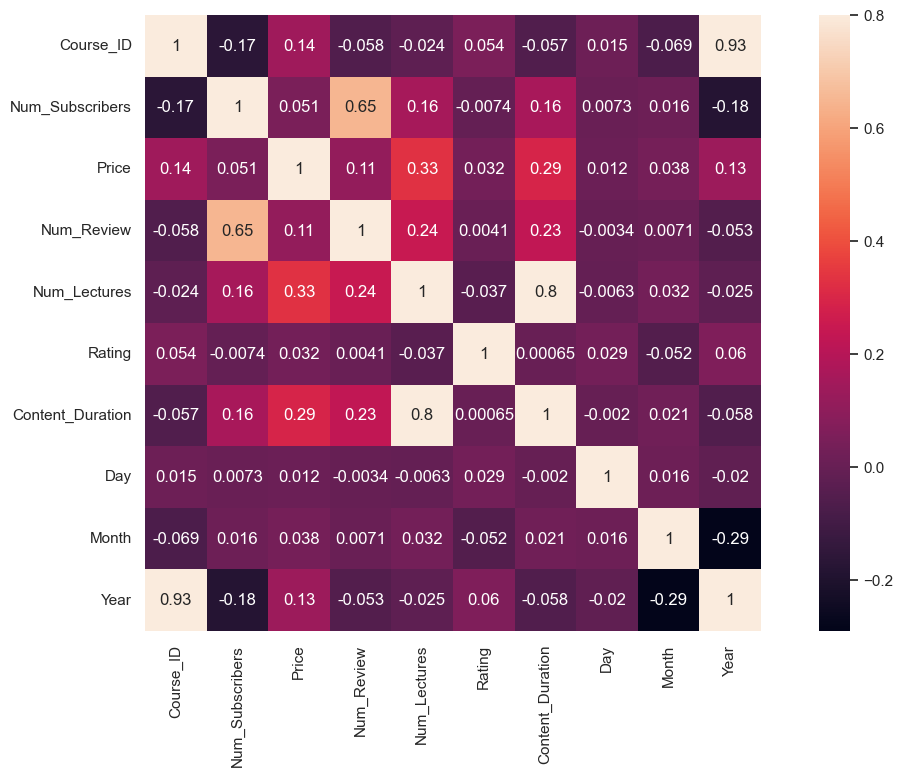

In [72]:
#Correlation; examining a column against another column
a= ed1.corr()
f,ax= plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);

Observation:
There is a correlation between:
1. Number of Lectures and Content Duration
2. Course and Rating received
3. Subscribers and Reveiws received.

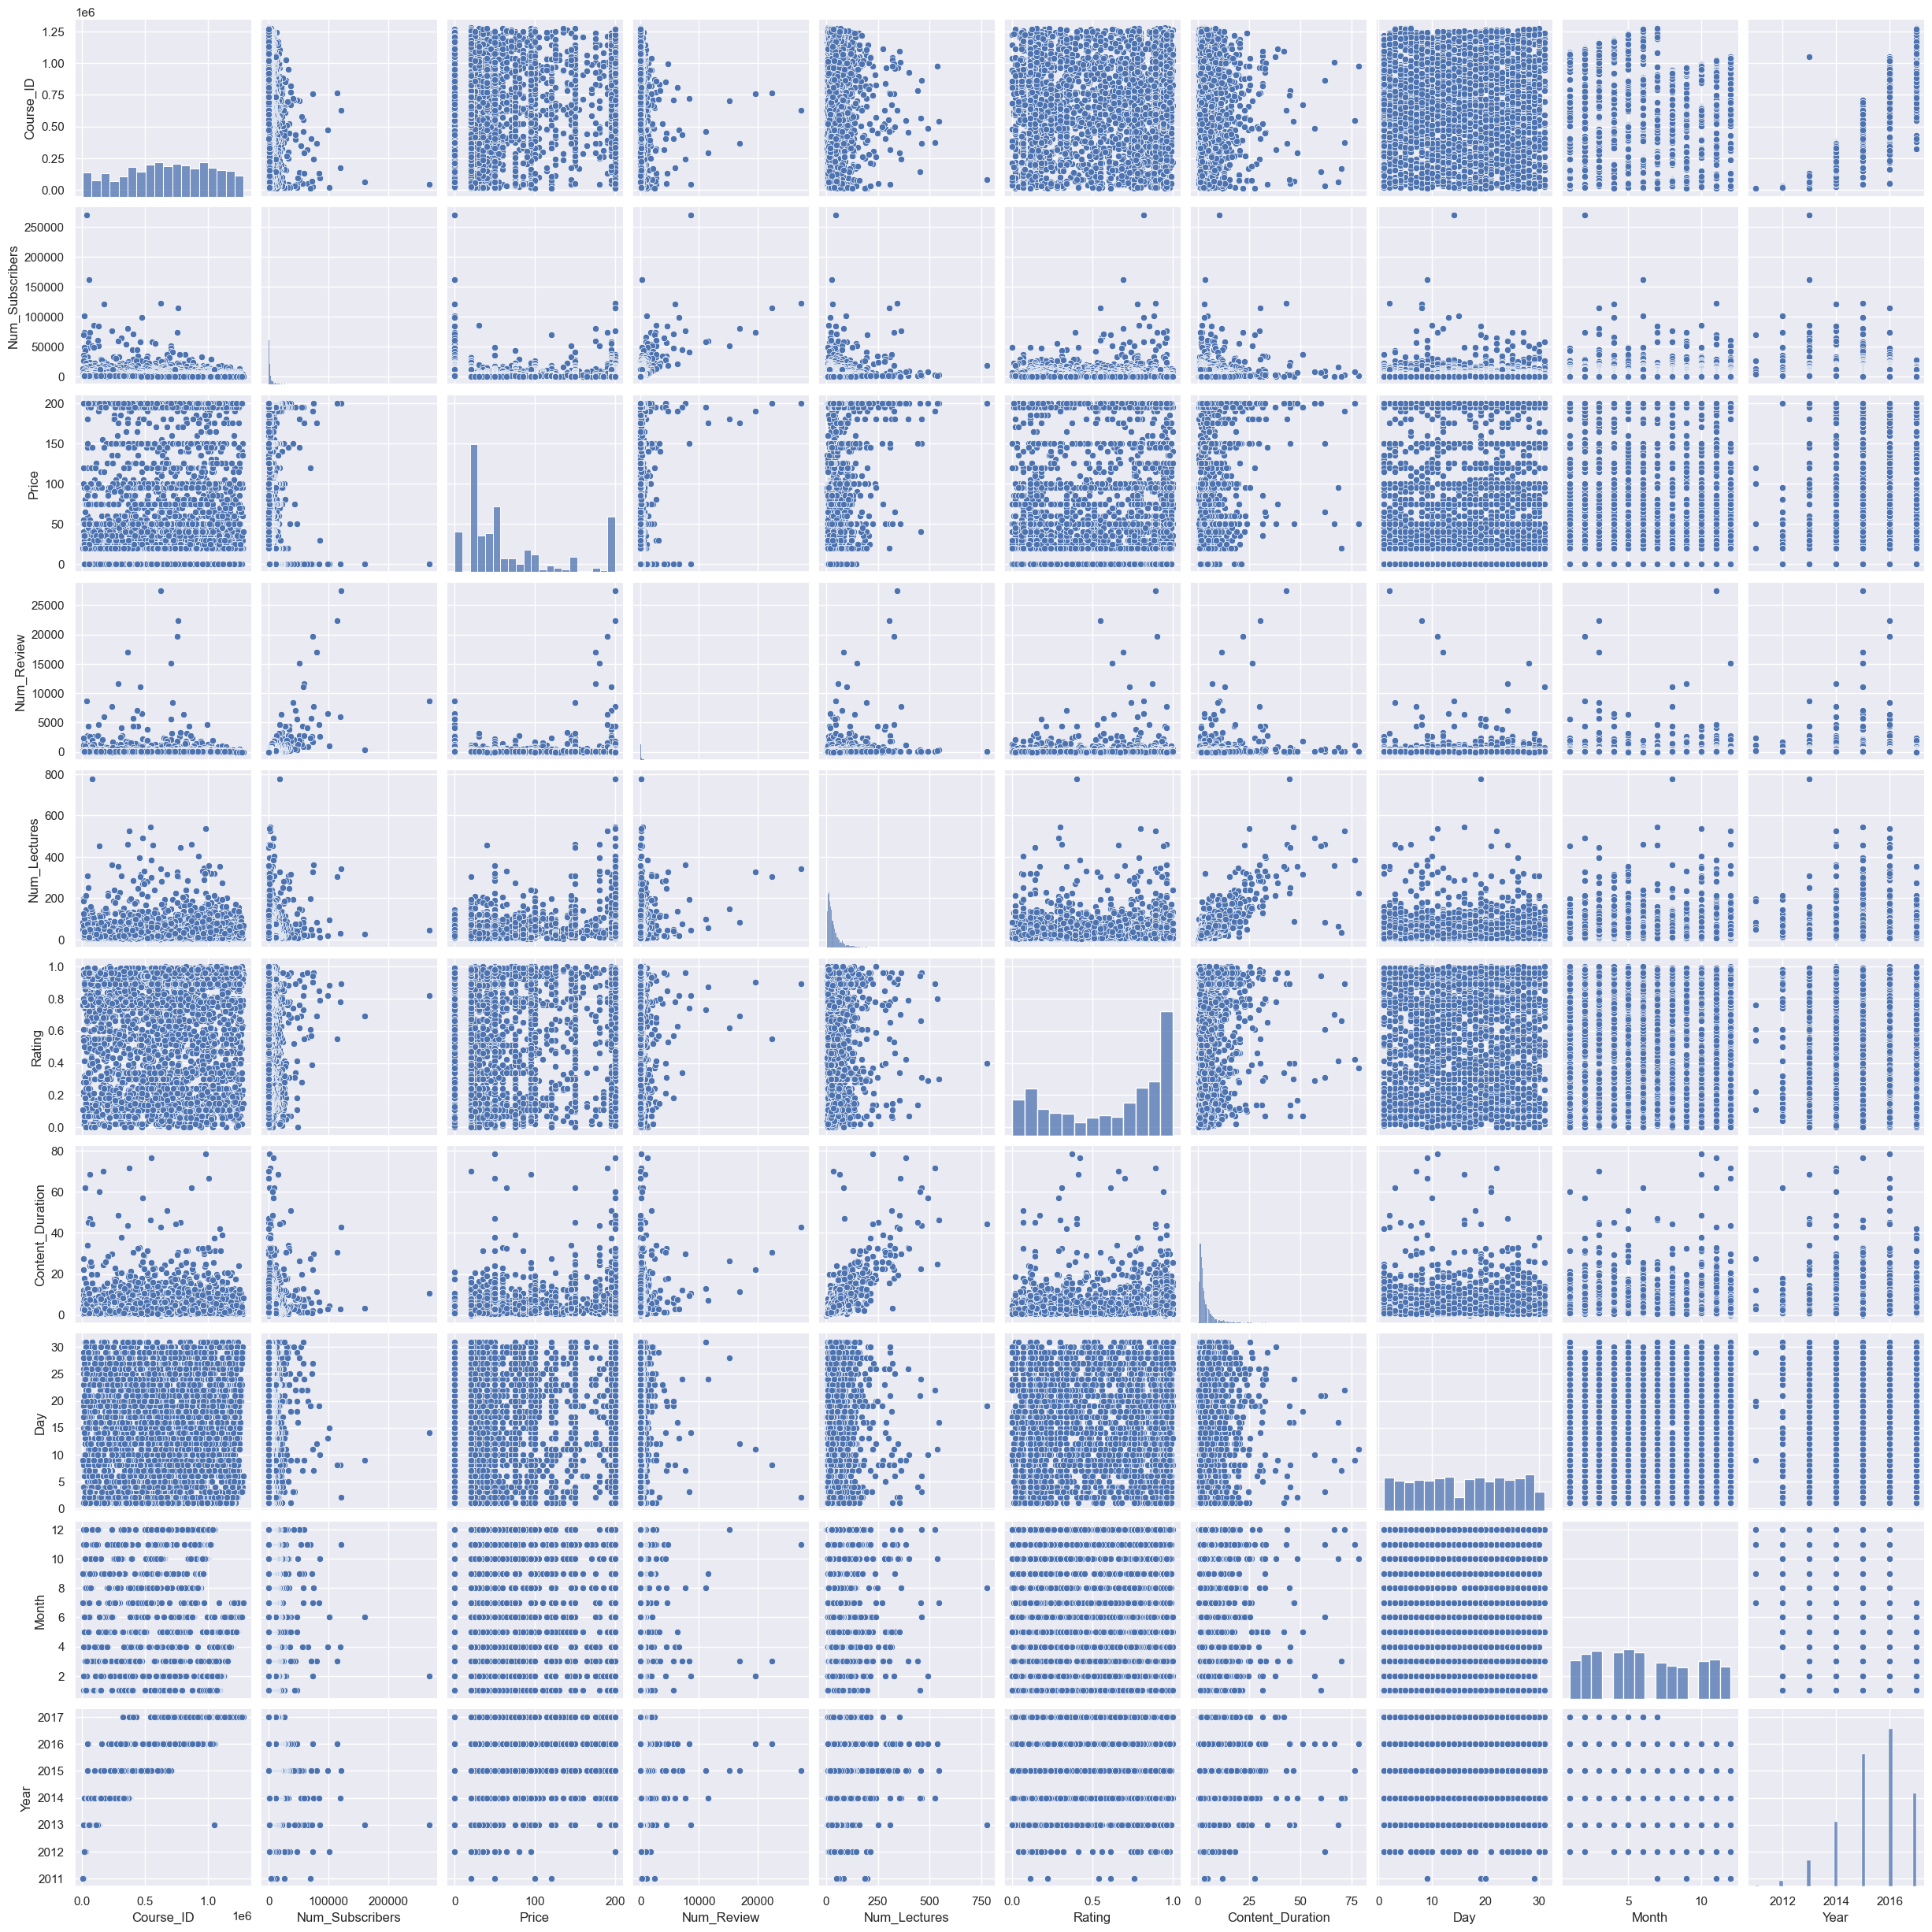

In [73]:
sns.pairplot(ed1, size=2.5);

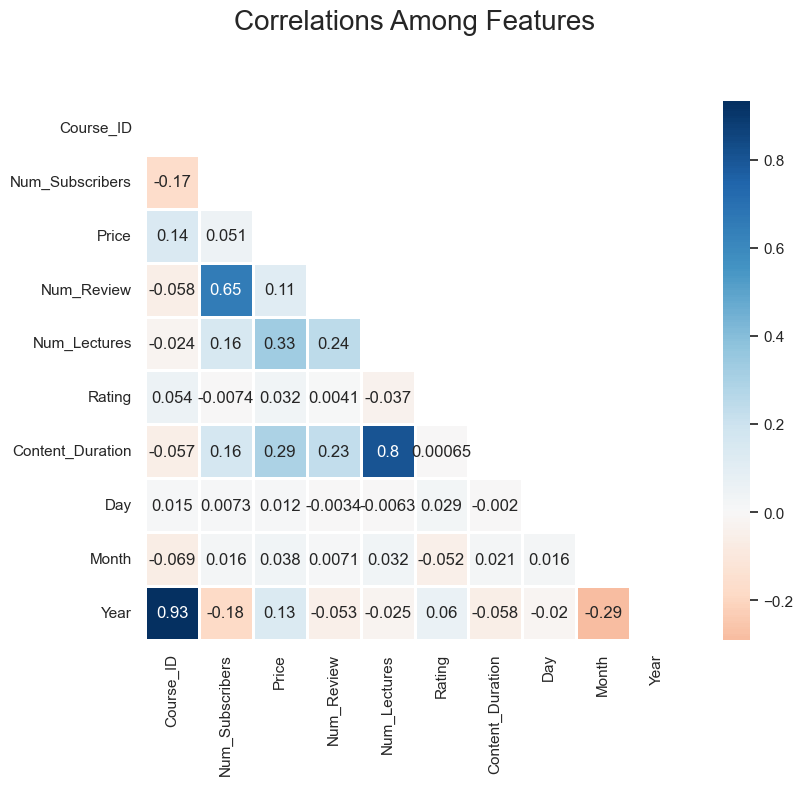

In [74]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(ed1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (10,7))
sns.heatmap(ed1.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

Observation: There is a correlation between:

1. Number of Lectures and Content Duration
2. Course and Rating received
3. Subscribers and Reveiws received.

# Conclusion:

1. Level : Most of the students request for courses at the Beginner level  34.6% with the least being Expert Level at 1.6%. EdSign Ed-Tech should reveiw Expert level courses and make sure they are updated and at the appropriate proficiency level. The data by the school also needs to be reviewed as we do not have a clear information of what 'All Levels' entails and this accounts for 52.4% of the data. Also the Beginner Level has the highest in terms of Number of Lectures, Reveiws, Content and Rating. This is why the same category has the highest number of subscriptions. To improve the other levels, EdSign Ed-Tech needs to improve its curriculum on the other levels as this will drive subscription as well as revenue.

2. Subject:  EdSign Ed-Tech should review marketing strategies as well as curriculums for the subjects that are lagging. Also, the subject(categories) should be broader to have a better overview of student/subject preference. The organization also needs to carry out marketing strategies to drive the Graphic Design and Musical Instruments courses. Also, the lessons on the other subjects should be updated to ensure a positive drive-in subscription that will lead to increased revenue.
Furthermore, is the organization offering proper channels for feedback on these other subjects? Are the students aware of these channels? A thorough investigation should be carried out to ensure adequate feedback is received as this will encourage positive development and growth in the organization.  

The low ratings in other subjects Musical Instrument and Graphic Design subjects needs to be investigated. Courses should be updated and feedback should be received and adopted. Also curriculum should be updated and up to par with organizations in the similar field.  New courses need to be added to other subject as this will improve revenue and efficiency.

3. Course Type: Only 8.46% of the courses EdSign Ed-Tech offers is free. There has been a steady annual increase in the courses published from 2011 to 2016. However, there is a drop in the year 2017. The organization should ensure that the  continuous growth is maintained and more courses are added preferable in the subjects lagging behind into the curriculum. Most students are registering for courses at the Beginner level even though the company has been operating for 7 years. The company should review its curriculum and implement strategies to drive other levels.

4. Price: Most of the students subscribed to courses with price ranging from $50 and below, highest within the $25 range. Also, there is a substantial subscription for the courses within the $200 price range. There is a higher subscription for the free courses ($0) compared to the other courses. There also seems to be a spike in subscribes in courses within price ranging from $175 to $200. However, there does not seem to be a direct correlation between Number of subscribers and the Price. 
The most expensive subject is Web Development at 38.13% with the least being Musical Instruments at 13.87%. While the beginner level courses are the most expensive with at 34.12% with the Expert Level being the least at 1.38%. This may be a factor of the number of courses available in these categories. To drive business revenue, new and relevant courses should be added to the other categories. There should also be aggressive marketing and awareness to ensure increased registration in these new fields.

